In [1]:
# Imports
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
%matplotlib notebook
from matplotlib.ticker import (MultipleLocator, FormatStrFormatter,
                               AutoMinorLocator)
from scipy.stats import linregress
from scipy import stats
from datetime import date

In [2]:
# Read in CSV files
combined_data = pd.read_csv("combined_data.csv")
nc_coordinate_data = pd.read_csv("NC_Coordinate_Data.csv")

In [3]:
# Merge CSV files into single DataFrame
combined_df = pd.merge(combined_data, nc_coordinate_data, on="city_id")
combined_df.head()

,id,city_id,name,datetime,tempmax,tempmin,temp,feelslikemax,feelslikemin,feelslike,...,sunrise,sunset,moonphase,conditions,description,icon,stations,City,Latitude,Longitude
0,1,nc01,"asheville,NC",1/1/23,62.8,40.3,48.1,62.8,40.3,48.1,...,2023-01-01T07:39:54,2023-01-01T17:27:50,0.32,"Rain, Partially cloudy",Partly cloudy throughout the day with early mo...,rain,"72314453890,72315003812,F2588,99999953877,KAVL",Asheville,35.5929,-82.557733
1,2,nc01,"asheville,NC",1/2/23,65.3,40.4,49.0,65.3,40.4,48.9,...,2023-01-02T07:40:04,2023-01-02T17:28:37,0.35,"Rain, Partially cloudy",Partly cloudy throughout the day with morning ...,rain,"72314453890,72315003812,F2588,99999953877,KAVL",Asheville,35.5929,-82.557733
2,3,nc01,"asheville,NC",1/3/23,64.0,49.4,57.5,64.0,49.4,57.5,...,2023-01-03T07:40:12,2023-01-03T17:29:25,0.39,"Rain, Overcast",Cloudy skies throughout the day with late afte...,rain,"72314453890,MAHN7,72315003812,F2588,9999995387...",Asheville,35.5929,-82.557733
3,4,nc01,"asheville,NC",1/4/23,60.6,42.3,54.8,60.6,40.2,54.7,...,2023-01-04T07:40:18,2023-01-04T17:30:14,0.42,"Rain, Partially cloudy",Partly cloudy throughout the day with a chance...,rain,"72314453890,72315003812,F2588,99999953877,KAVL",Asheville,35.5929,-82.557733
4,5,nc01,"asheville,NC",1/5/23,58.2,32.8,44.8,58.2,32.8,44.0,...,2023-01-05T07:40:22,2023-01-05T17:31:04,0.46,"Snow, Rain",Clear conditions throughout the day with rain ...,rain,"72314453890,72315003812,F2588,99999953877,9999...",Asheville,35.5929,-82.557733


In [4]:
# Rename column and change date column to datetime
del combined_df['City']
combined_df = combined_df.rename(columns={'name':'city'})
combined_df['datetime'] = pd.to_datetime(combined_df['datetime'])

/var/folders/_0/z435wnvn6236c4cm5wmb3_4w0000jc/T/ipykernel_81543/3704893527.py:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  combined_df['datetime'] = pd.to_datetime(combined_df['datetime'])


In [5]:
# Print list of NC cities for user to select from
print("Please select three North Carolina cities from the following list to compare average daily temperatures from 2023.")
print("----------")
print("When prompted, please enter the appropriate city ID.")
print("----------")
print("Asheville - nc01")
print("Banner Elk - nc02")
print("Boone - nc03")
print("Charlotte - nc04")
print("Cherokee - nc05")
print("Emerald Isle - nc06")
print("High Point - nc07")
print("Nags Head - nc08")
print("Ocracoke - nc09")
print("Raleigh - nc10")
print("Wilmington - nc11")
print("Winston-Salem - nc12")

Please select three North Carolina cities from the following list to compare average daily temperatures from 2023.
----------
When prompted, please enter the appropriate city ID.
----------
Asheville - nc01
Banner Elk - nc02
Boone - nc03
Charlotte - nc04
Cherokee - nc05
Emerald Isle - nc06
High Point - nc07
Nags Head - nc08
Ocracoke - nc09
Raleigh - nc10
Wilmington - nc11
Winston-Salem - nc12


In [6]:
# Assign inputs to variables and combine them into single variable for graphing
city1 = input("What is the first city ID you would like to search? ")
city2 = input("What is the second city ID you would like to search? ")
city3 = input("What is the third city ID you would like to search? ")
combined_cities = (str(city1) + "|" + str(city2) + "|" + str(city3))

What is the first city ID you would like to search? nc03
What is the second city ID you would like to search? nc04
What is the third city ID you would like to search? nc11


In [7]:
# Create filtered DataFrame with three selected cities
filtered_df = combined_df[combined_df["city_id"].str.contains(combined_cities)]
filtered_df

,id,city_id,city,datetime,tempmax,tempmin,temp,feelslikemax,feelslikemin,feelslike,...,severerisk,sunrise,sunset,moonphase,conditions,description,icon,stations,Latitude,Longitude
730,731,nc03,"Boone, NC",2023-01-01,59.4,47.1,51.2,59.4,43.8,49.4,...,10,2023-01-01T07:38:04,2023-01-01T17:22:43,0.32,"Rain, Partially cloudy",Partly cloudy throughout the day with rain in ...,rain,"72314863859,0586W,72314653892,KMRN,KGEV,E6072",36.216749,-81.676003
731,732,nc03,"Boone, NC",2023-01-02,64.6,45.3,53.1,64.6,45.3,53.1,...,10,2023-01-02T07:38:14,2023-01-02T17:23:31,0.35,Partially cloudy,Becoming cloudy in the afternoon.,partly-cloudy-day,"RVZN7,72314863859,72314653892,KMRN,KGEV,E6072",36.216749,-81.676003
732,733,nc03,"Boone, NC",2023-01-03,64.8,50.4,56.6,64.8,50.4,56.6,...,10,2023-01-03T07:38:21,2023-01-03T17:24:19,0.39,"Rain, Partially cloudy",Partly cloudy throughout the day with rain.,rain,"RVZN7,72314863859,72314653892,KMRN,KGEV,E6072,...",36.216749,-81.676003
733,734,nc03,"Boone, NC",2023-01-04,59.4,51.7,55.8,59.4,51.7,55.8,...,10,2023-01-04T07:38:27,2023-01-04T17:25:09,0.42,"Rain, Partially cloudy",Partly cloudy throughout the day with rain in ...,rain,"72314863859,0586W,72314653892,KMRN,KGEV,E6072,...",36.216749,-81.676003
734,735,nc03,"Boone, NC",2023-01-05,57.3,40.3,47.0,57.3,35.5,44.3,...,10,2023-01-05T07:38:31,2023-01-05T17:26:00,0.46,Rain,Clear conditions throughout the day with after...,rain,"72301003810,72314863859,KHKY,0586W,72314653892...",36.216749,-81.676003
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4010,4011,nc11,Wilmington,2023-12-27,68.7,60.2,64.8,68.7,60.2,64.8,...,10,2023-12-27T07:16:32,2023-12-27T17:09:14,0.52,"Rain, Partially cloudy",Partly cloudy throughout the day with a chance...,rain,"1055W,72309693727,99769599999,72302013748,KILM",34.210462,-77.883399
4011,4012,nc11,Wilmington,2023-12-28,59.1,48.3,54.4,59.1,45.6,54.2,...,10,2023-12-28T07:16:52,2023-12-28T17:09:54,0.55,Clear,Clear conditions throughout the day.,clear-day,"1055W,72309693727,99769599999,72302013748,KILM...",34.210462,-77.883399
4012,4013,nc11,Wilmington,2023-12-29,60.8,40.9,48.8,60.8,34.7,46.8,...,10,2023-12-29T07:17:10,2023-12-29T17:10:34,0.59,Clear,Clear conditions throughout the day.,clear-day,"1055W,72309693727,99769599999,72302013748,KILM",34.210462,-77.883399
4013,4014,nc11,Wilmington,2023-12-30,50.9,37.4,42.9,50.9,30.8,37.7,...,10,2023-12-30T07:17:27,2023-12-30T17:11:16,0.62,Partially cloudy,Partly cloudy throughout the day.,partly-cloudy-day,"1055W,72309693727,99769599999,72302013748,KILM...",34.210462,-77.883399


In [8]:
# Group DataFrame by city and average daily temperatures
temp_grouped_df = filtered_df.groupby(['city', 'datetime'])['temp'].sum()
print(temp_grouped_df)

city           datetime  
Boone, NC      2023-01-01    51.2
               2023-01-02    53.1
               2023-01-03    56.6
               2023-01-04    55.8
               2023-01-05    47.0
                             ... 
charlotte, nc  2023-12-27    57.7
               2023-12-28    49.7
               2023-12-29    40.9
               2023-12-30    42.0
               2023-12-31    41.5
Name: temp, Length: 1095, dtype: float64


<IPython.core.display.Javascript object>


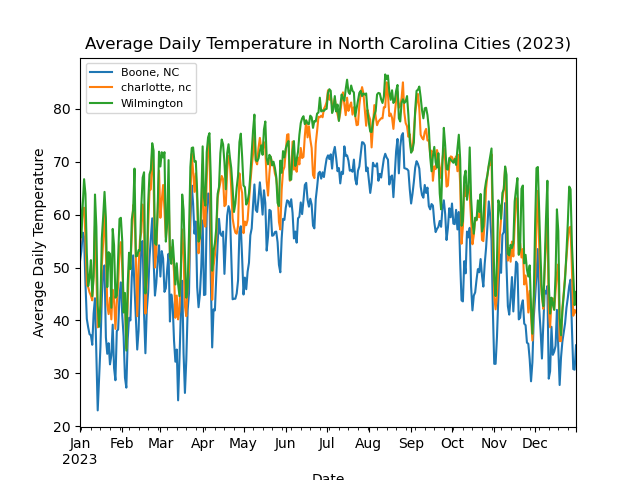

In [9]:
# Plot results
fig, ax = plt.subplots()
for city in set(a[0] for a in temp_grouped_df.index):
    temp_grouped_df[city].plot(ax=ax, label=city)
    plt.legend(fontsize="8", loc ="upper left")
    plt.title('Average Daily Temperature in North Carolina Cities (2023)')
    plt.ylabel('Average Daily Temperature')
    plt.xlabel('Date')
    plt.show()